In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [36]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [37]:
df.head()
print(df.shape)

(10000, 14)


In [38]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [42]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [43]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [44]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
#one hot encoding of columns- geography , gender and drop_first means France got deleted
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [47]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [48]:
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [49]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [50]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [52]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,True,False,True
5140,626,29,4,105767.28,2,0,0,41104.82,False,False,False
2568,612,47,6,130024.87,1,1,1,45750.21,True,False,False
3671,646,52,6,111739.40,2,0,1,68367.18,True,False,False
7427,714,33,8,122017.19,1,0,0,162515.17,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,True,False,True
7813,684,63,3,81245.79,1,1,0,69643.31,True,False,False
905,672,45,9,0.00,1,1,1,92027.69,False,False,False
5192,663,39,8,0.00,2,1,1,101168.90,False,False,False


In [53]:
#scale X_train(i.e values like 135678.665 must be scaled )
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #scaler is object of StandardScaler() class.

X_train_scaled=scaler.fit_transform(X_train) # X_train_scaled is a variable
X_test_scaled=scaler.transform(X_test)

In [54]:
# 2D array , each array inside 2D array represents customers values.
#after One hot encoding and scaling we are ready to apply Pytorch.
X_train_scaled


array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [58]:
import tensorflow

In [59]:
from tensorflow import keras

In [60]:
from tensorflow.keras import Sequential

In [61]:
from tensorflow.keras.layers import Dense

In [88]:
#Model building in keras 1.Sequential 2.Non sequential
# In each Model of keras we have: a. input layer b. hidden layer c. Output layer.


model=Sequential() #creating object of sequential model .



# We have one input layer , one hidden layer , one output layer. Total_parameters= (11*3+3) + (3*1+1)= 40 . 

# model.add(Dense(3,activation='sigmoid',input_dim=11)) # hidden layer nodes=3 with input = 11
model.add(Dense(11,activation='relu',input_dim=11)) # hidden layer 1
model.add(Dense(11,activation='relu')) # hidden layer 2
model.add(Dense(1,activation='sigmoid')) # Output layer

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
# After creation of NN now we have to compile the model . 
# i.e Tell model which loss function to use and which optimizer to use for gradient descent.

model.compile(loss='binary_crossentropy', optimizer='Adam' , metrics=['accuracy'])



In [91]:
# Training of Neural Network  

# model.fit(X_train_scaled, y_train , epochs=10)

# validation_split = Model run on (total customers - 20% customers) also test on 20% customers and gives us accuracy.


history = model.fit(X_train_scaled, y_train, epochs=100 , validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7249 - loss: 0.5789 - val_accuracy: 0.7937 - val_loss: 0.4741
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8025 - loss: 0.4625 - val_accuracy: 0.8006 - val_loss: 0.4444
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8090 - loss: 0.4299 - val_accuracy: 0.8087 - val_loss: 0.4280
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8242 - loss: 0.4084 - val_accuracy: 0.8138 - val_loss: 0.4146
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8297 - loss: 0.3949 - val_accuracy: 0.8194 - val_loss: 0.4049
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8302 - loss: 0.3974 - val_accuracy: 0.8256 - val_loss: 0.3926
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.3880 - val_accuracy: 0.8406 - val_loss: 0.3807
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8464 - loss: 0.3734 - val_accu

In [92]:
# weights of input to hidden layers(i.e layer 1) = 11*3 =33
# and biases = 3

model.layers[0].get_weights()

[array([[-0.1905348 , -0.09854301, -0.3292098 ,  0.22172724,  0.18933874,
         -0.26229748, -0.28666696, -0.30146292, -0.05119684, -0.18226065,
         -0.1358959 ],
        [ 0.32118145, -0.60518384, -0.13524194, -0.08844795, -0.10549144,
         -0.5118738 ,  0.97440714, -0.7241553 ,  0.83330834,  0.78876233,
         -0.13142776],
        [ 0.0386851 ,  0.06117955,  0.01977269,  0.12502128, -0.14019257,
          0.12925534,  0.28148443,  0.01840174,  0.04538952,  0.2108637 ,
          0.10780914],
        [-0.5581913 ,  0.1672561 , -0.13065414, -0.15183532, -0.2095367 ,
         -0.7312784 , -0.48266375, -0.01142852,  0.1418594 , -0.03660391,
          0.09149322],
        [-0.9184467 ,  0.18365029,  0.9040352 ,  0.03954638, -0.2917196 ,
         -0.10453714, -0.07703184,  0.07223868, -0.32758534,  1.2373375 ,
          1.0856521 ],
        [-0.0200465 ,  0.05216958,  0.81057364, -0.08566304,  0.08031586,
         -0.1770843 ,  0.28795975, -0.05934307, -0.03947716,  0.0674326

In [93]:
# weights of hidden layer to output layer(i.e layer 2) = 3*1=3
# and biases = 1 

model.layers[1].get_weights()

[array([[ 0.80969185,  0.02586008,  0.29694426, -0.4659558 , -0.41684046,
          0.17348462,  0.18426973,  0.68689173, -0.99657243, -0.08802371,
         -0.45171022],
        [-0.40796828, -0.47813216, -0.2759245 ,  0.13240215,  0.45172277,
          0.86574453,  0.40789327, -0.33457512, -0.6376214 ,  0.25212428,
         -0.46754894],
        [-0.43596452,  0.48815894,  0.12624688, -0.4361385 ,  0.43212825,
         -0.32778314, -0.26531917,  0.72087675,  0.16305004,  0.29324657,
         -0.39567783],
        [-0.07269929,  0.24103151, -0.4061372 ,  0.39550647,  0.41338393,
          0.29568654,  0.2507685 ,  0.16828449,  0.19888522,  0.14270802,
         -0.44185194],
        [ 0.55255735,  0.35693994,  0.10589334, -0.39773297,  0.42151093,
          0.08246423,  0.48282793, -0.21072938, -0.0562088 ,  0.21607158,
         -0.2624089 ],
        [ 0.52622414,  0.44797117, -0.51128787,  0.20687987,  0.5951932 ,
          0.10074972,  0.2431719 ,  0.15075605, -0.6991308 ,  0.2836012

In [94]:
# training completed now we can predict.
# we must provide scaled test data so that our model will take less time.

# output of sigmoid is btw 0 to 1 anything. To make output 0 or 1 ( if value > 0.5 then 1 else 0)
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [97]:
#To make output 0 or 1 ( if value > 0.5 then 1 else 0) .

y_pred = np.where(y_log>0.5,1,0)

In [98]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [99]:
# checking accuracy of this model.
# to increase accuracy 1. Increase epochs in training. 
# 2. generally activation fn of hidden layer Relu give more accuracy.
# 3. Increase the nodes of hidden layer.
# 4. Increase hidden layer .

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861

In [100]:
import matplotlib.pyplot as plt

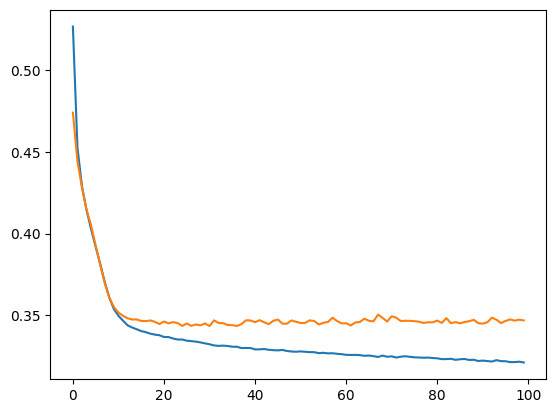

In [103]:
# convert each epochs in key-value pair.
# history.history

# To convert result of history.history in graph .

plt.plot(history.history['loss'])  # loss
plt.plot(history.history['val_loss']) # validation-loss


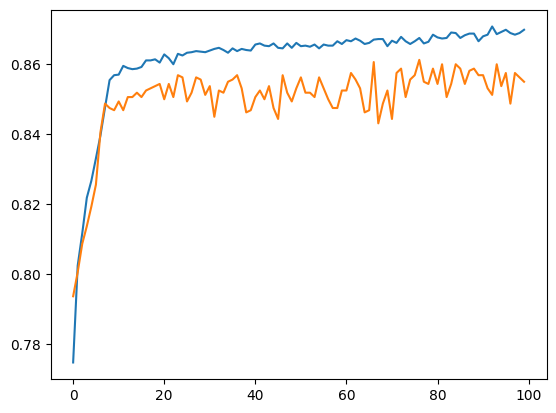

In [107]:
# creating graph for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# the gap between two curve shows overfitting (i.e higher the gap most probable of overfitting).
#to remove overfitting use regularization or dropout.